In [70]:
#import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.inspection import permutation_importance
from scipy.stats import uniform, randint
from collections import Counter
import joblib
import pickle
import warnings
warnings.filterwarnings('ignore')


In [2]:
data1 = pd.read_csv("Train new.csv")
data1

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
data1.shape

(10999, 12)

In [5]:
data1.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [6]:
data1.describe(include='all')

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999,10999,10999.000000,10999.000000,10999.000000,10999.000000,10999,10999,10999.000000,10999.000000,10999.000000
unique,NaN,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,NaN,3666,7462,NaN,NaN,NaN,NaN,5297,5545,NaN,NaN,NaN
mean,5500.00000,NaN,NaN,4.054459,2.990545,210.196836,3.567597,NaN,NaN,13.373216,3634.016729,0.596691
std,3175.28214,NaN,NaN,1.141490,1.413603,48.063272,1.522860,NaN,NaN,16.205527,1635.377251,0.490584
min,1.00000,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,2750.50000,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1839.500000,0.000000
50%,5500.00000,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4149.000000,1.000000
75%,8249.50000,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5050.000000,1.000000


In [7]:
data1.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [8]:
data1.columns.tolist()

['ID',
 'Warehouse_block',
 'Mode_of_Shipment',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Product_importance',
 'Gender',
 'Discount_offered',
 'Weight_in_gms',
 'Reached.on.Time_Y.N']

In [9]:
data1.nunique()

ID                     10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

In [10]:
# Check for duplicate rows
duplicates = data1.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# If duplicates exist, remove them
data1 = data1.drop_duplicates()


Number of duplicate rows: 0


In [11]:
counts = data1['Reached.on.Time_Y.N'].value_counts()
print(counts)

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64


# Univariate analysis for categorical columns

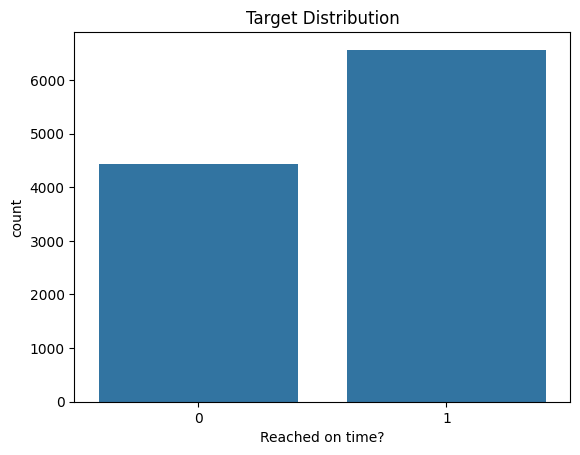

In [12]:
#Target Distribution
sns.countplot(x='Reached.on.Time_Y.N',data=data1)
plt.title('Target Distribution')
plt.xlabel('Reached on time?')
plt.show()

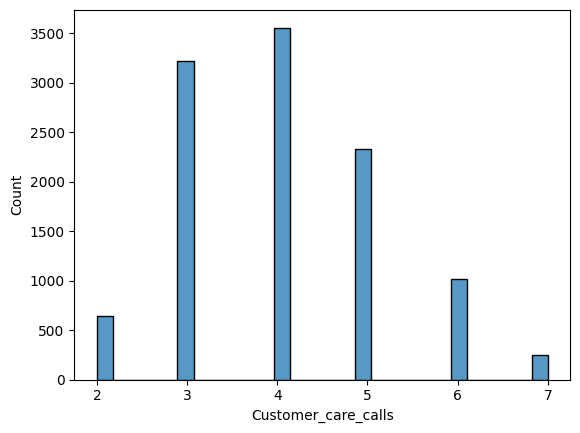

In [13]:
sns.histplot(data1["Customer_care_calls"])
plt.show()

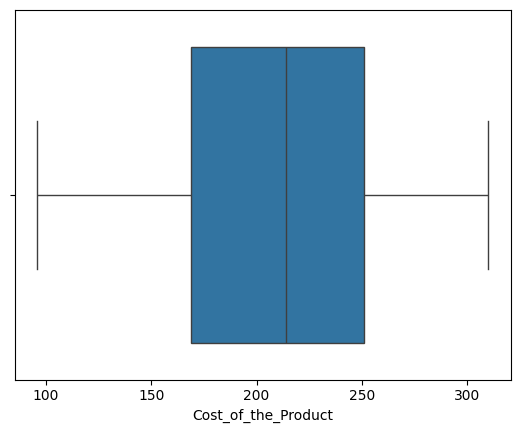

In [14]:
sns.boxplot(x=data1["Cost_of_the_Product"])
plt.show()

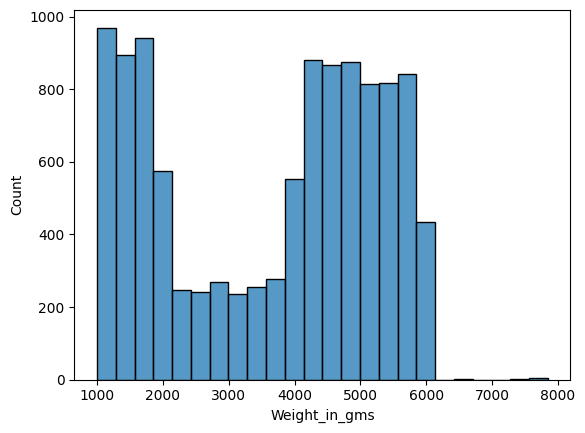

In [15]:
sns.histplot(data1["Weight_in_gms"])
plt.show()

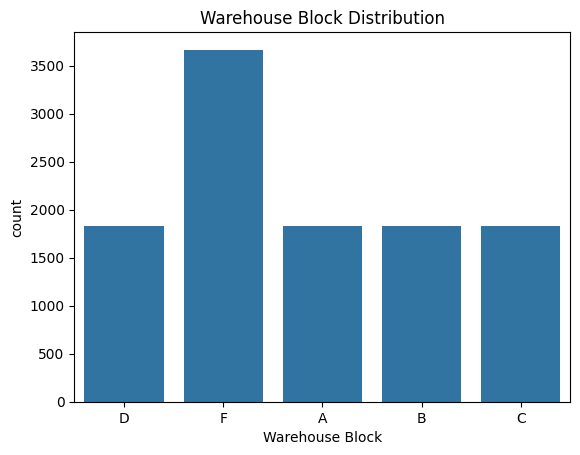

In [16]:
sns.countplot(x='Warehouse_block', data=data1)
plt.title('Warehouse Block Distribution')
plt.xlabel('Warehouse Block')
plt.show()

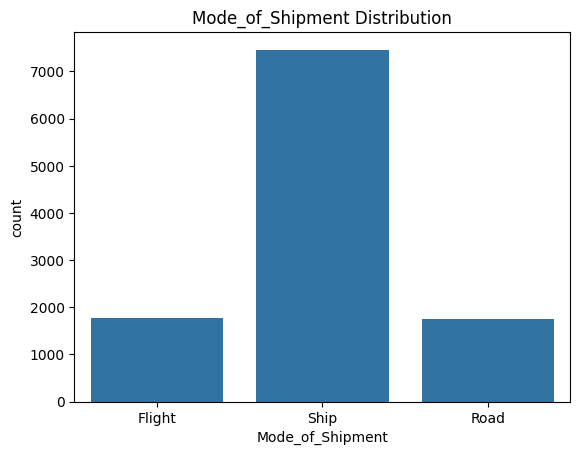

In [17]:
sns.countplot(x='Mode_of_Shipment', data=data1)
plt.title('Mode_of_Shipment Distribution')
plt.xlabel('Mode_of_Shipment')
plt.show()

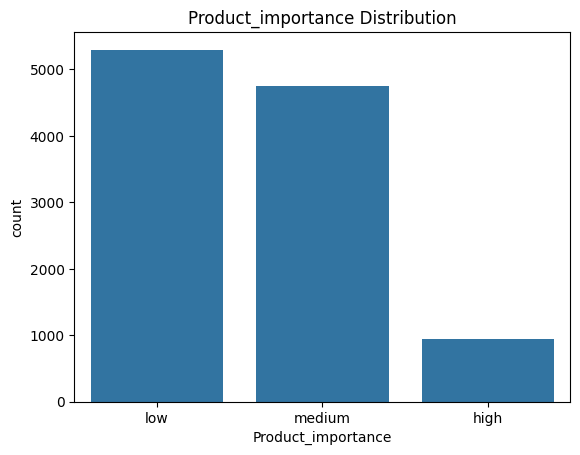

In [18]:
sns.countplot(x='Product_importance', data=data1)
plt.title('Product_importance Distribution')
plt.xlabel('Product_importance')
plt.show()

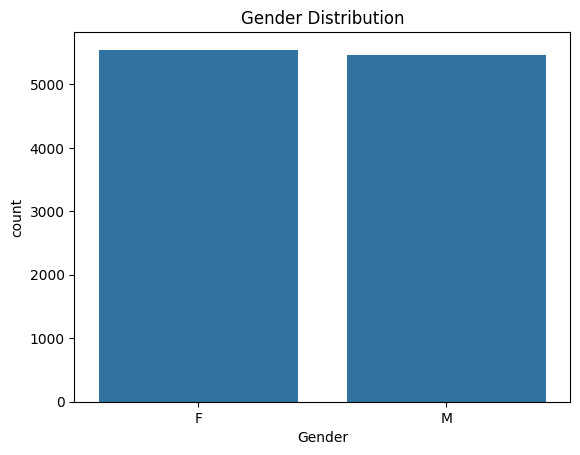

In [19]:
sns.countplot(x='Gender', data=data1)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.show()

# Univariate analysis for numerical columns

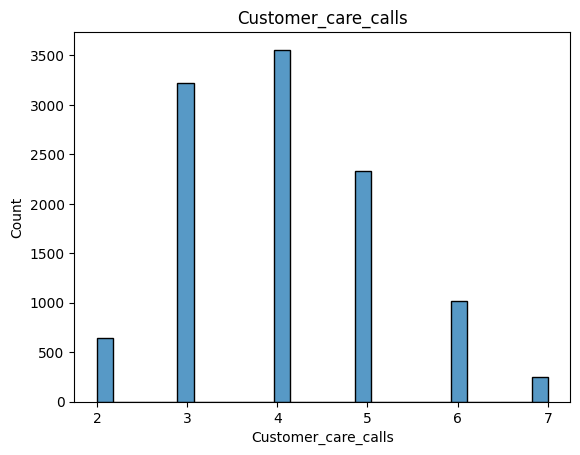

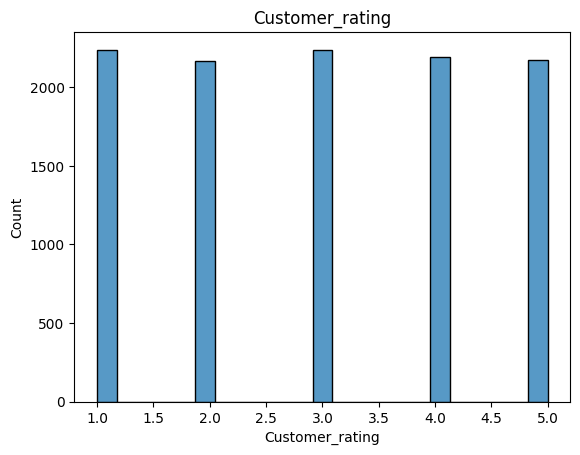

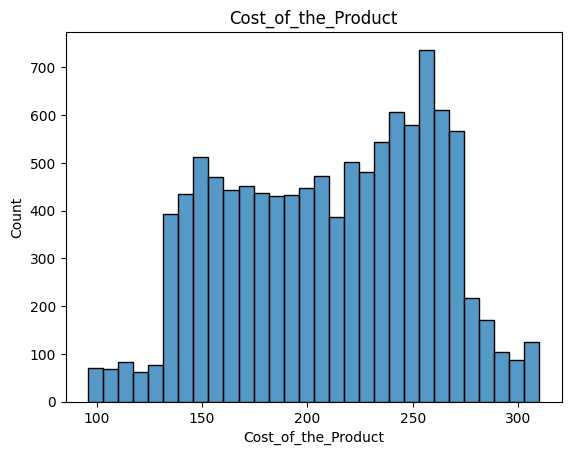

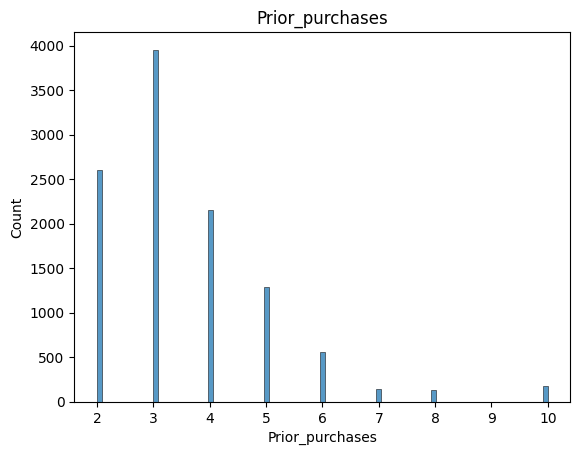

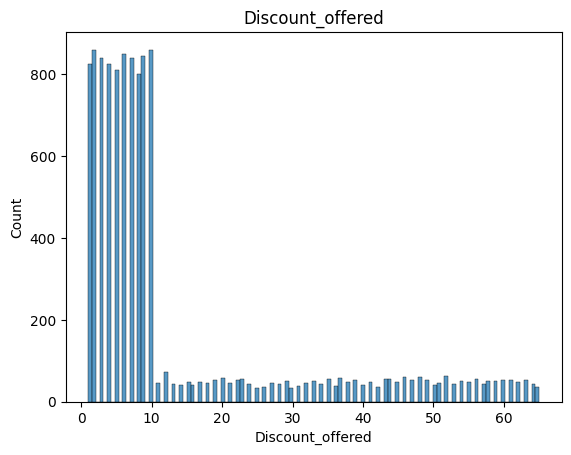

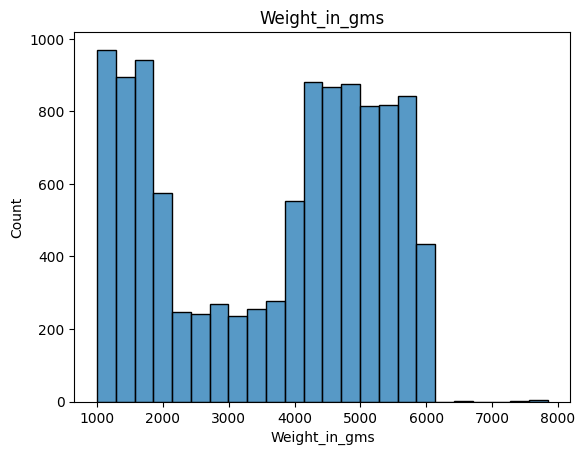

In [20]:

cols = ['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms']
for z in cols:
    sns.histplot(data1[z])
    plt.title(z)
    plt.show()

# Bivariate Analysis: Relationship between two columns

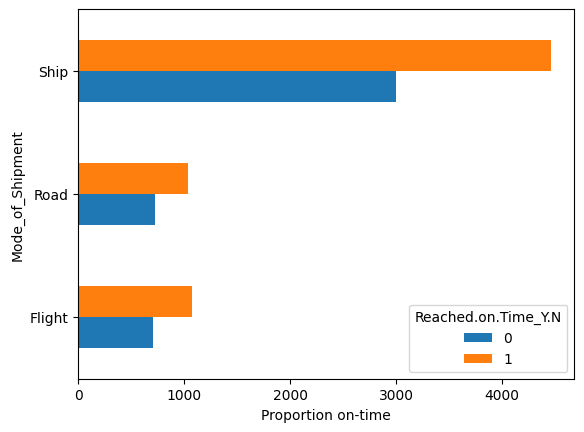

In [21]:
s = pd.crosstab(data1['Mode_of_Shipment'],data1['Reached.on.Time_Y.N'])
s.plot(kind='barh')
plt.xlabel('Proportion on-time')
plt.show()


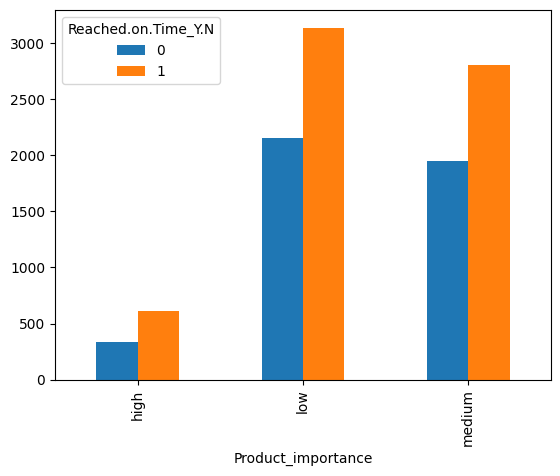

In [22]:
t = pd.crosstab(data1['Product_importance'],data1['Reached.on.Time_Y.N'])
t.plot(kind='bar')
plt.show()

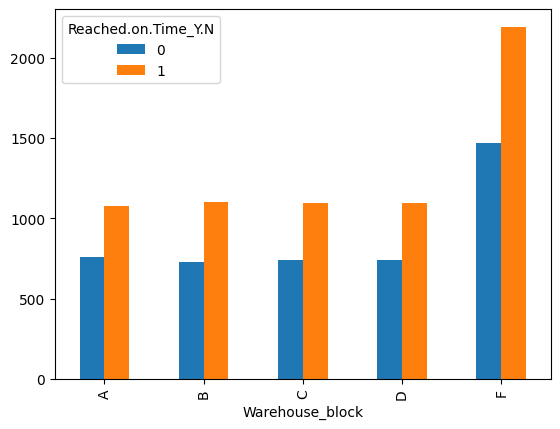

In [23]:
r = pd.crosstab(data1['Warehouse_block'],data1['Reached.on.Time_Y.N'])
r.plot(kind='bar')
plt.show()

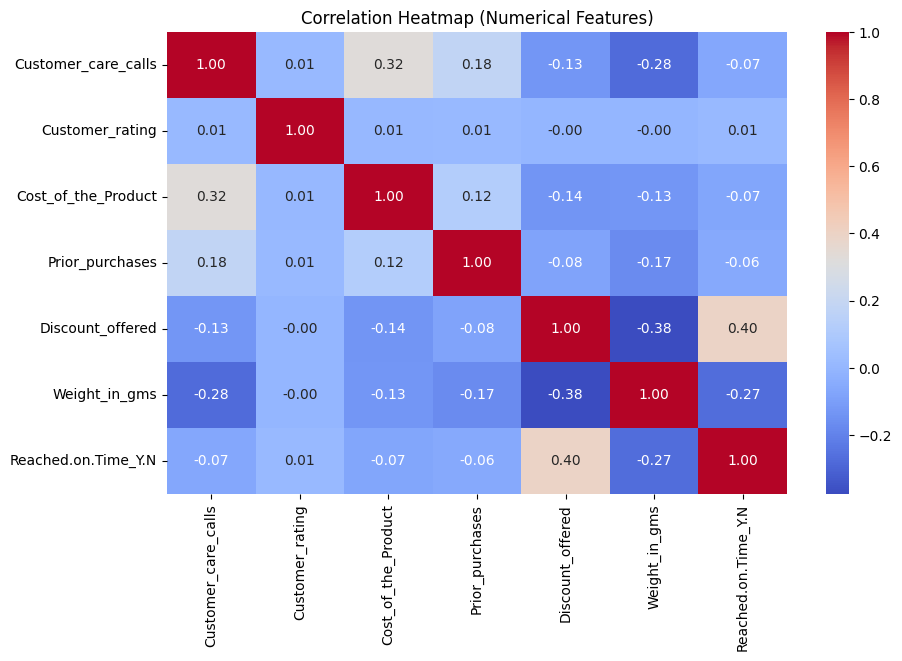

In [24]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10,6))
corr = data1[cols + ['Reached.on.Time_Y.N']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


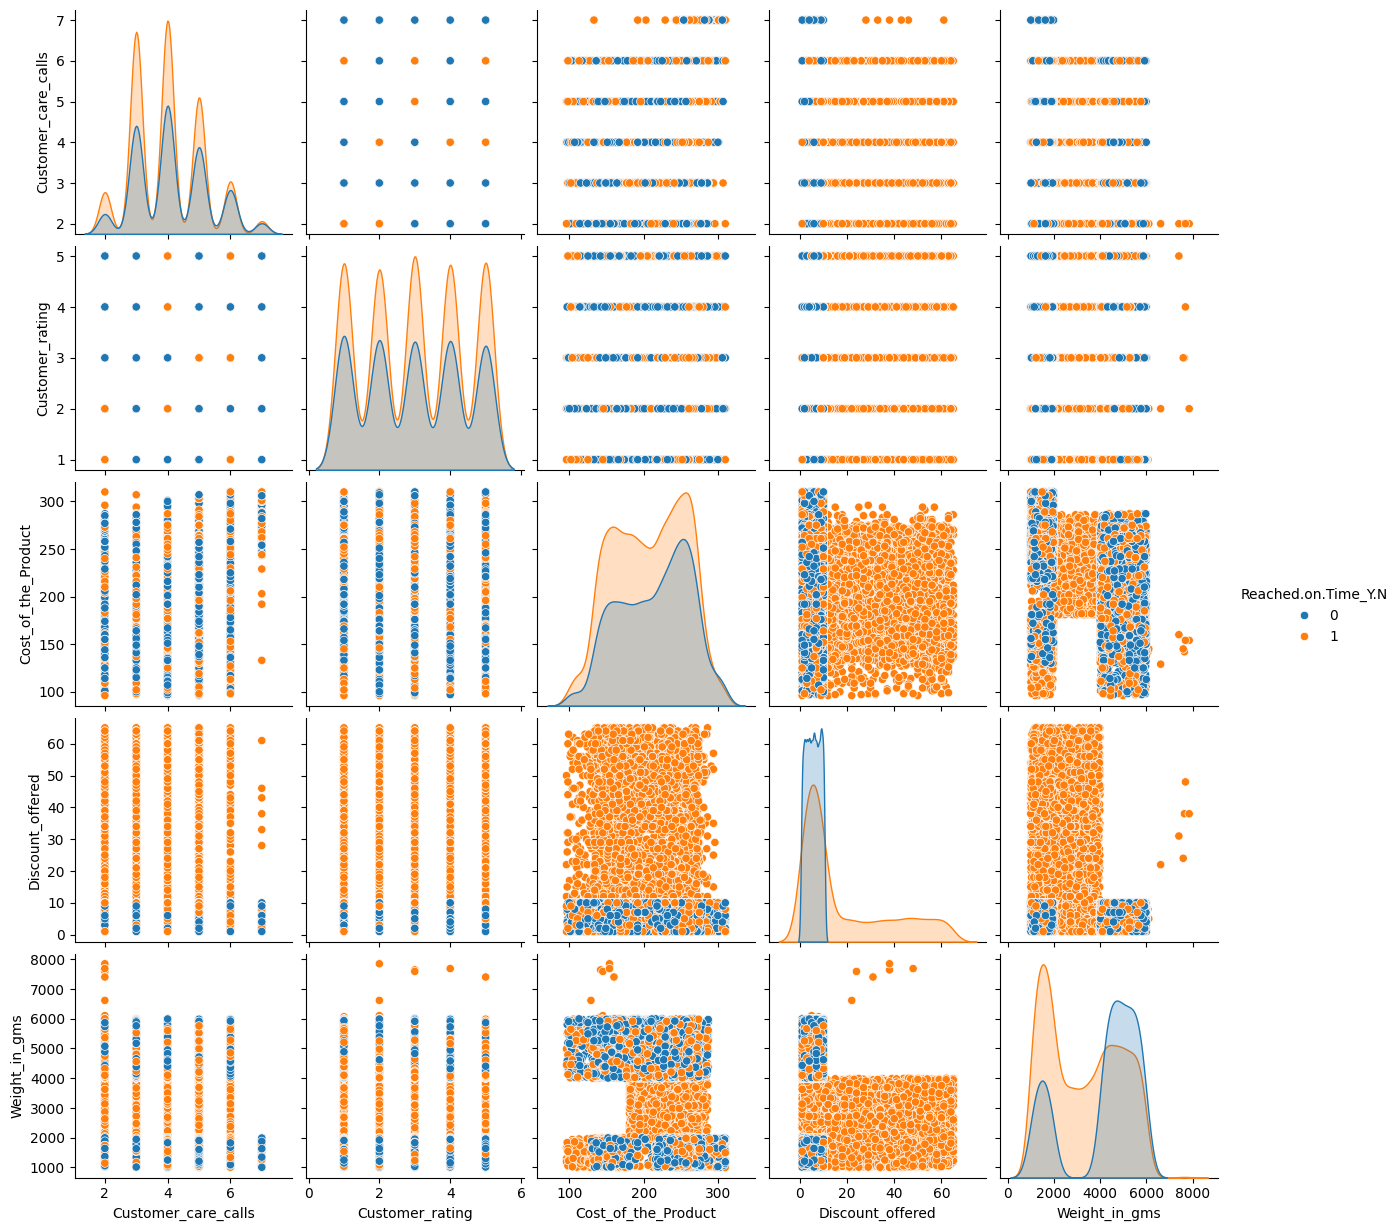

In [25]:
# Pairplot: shows scatter plots + histograms together
sns.pairplot(data1[['Customer_care_calls','Customer_rating',
                    'Cost_of_the_Product','Discount_offered',
                    'Weight_in_gms','Reached.on.Time_Y.N']],
             hue='Reached.on.Time_Y.N')
plt.show()


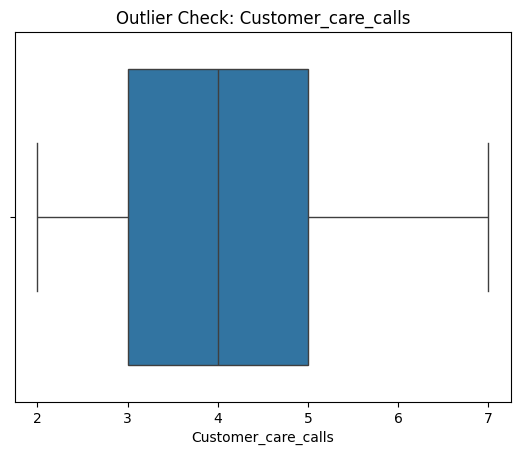

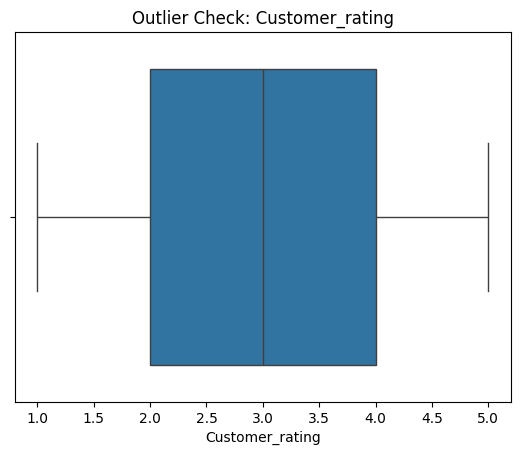

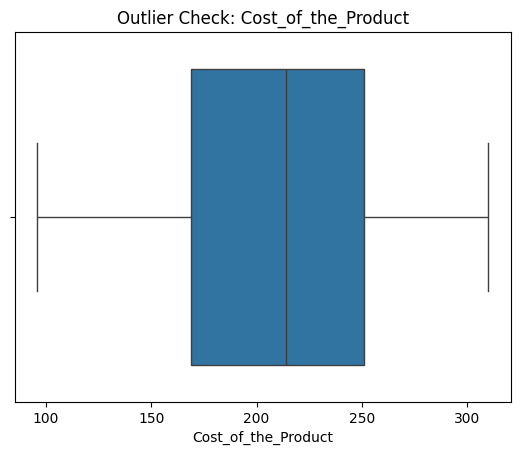

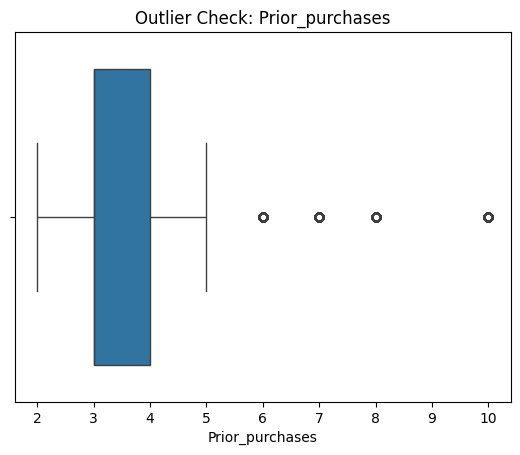

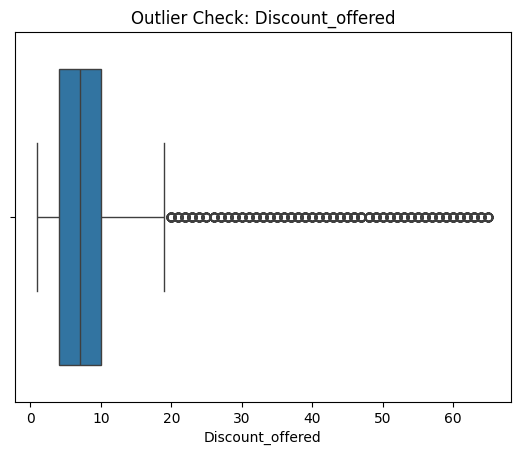

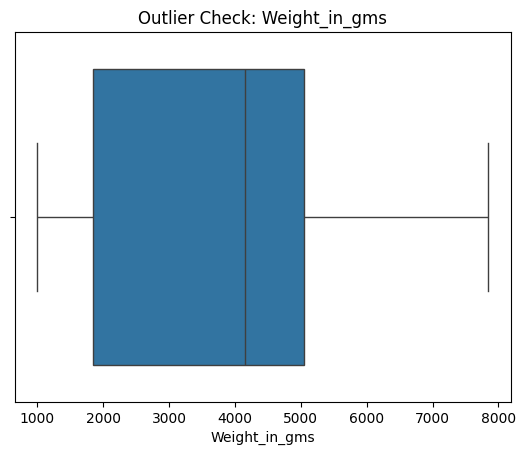

In [26]:
# Outlier detection using boxplots
for z in cols:
    sns.boxplot(x=data1[z])
    plt.title(f'Outlier Check: {z}')
    plt.show()


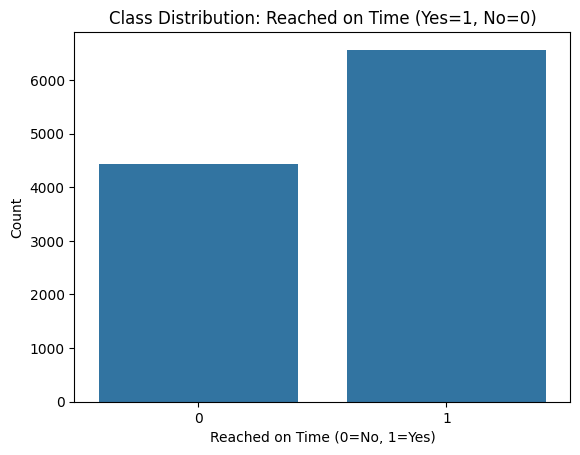

In [27]:
sns.countplot(x='Reached.on.Time_Y.N', data=data1)
plt.title("Class Distribution: Reached on Time (Yes=1, No=0)")
plt.xlabel("Reached on Time (0=No, 1=Yes)")
plt.ylabel("Count")
plt.show()


# Label encoding and one hot encoding



In [75]:
# Copy dataset
encode_data = data1.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Label Encode
encoders = {}  # dictionary to store encoders

for col in ['Product_importance', 'Gender']:
    le = LabelEncoder()
    encode_data[col] = le.fit_transform(encode_data[col])
    encoders[col] = le  # save encoder for later use

# One-Hot Encode nominal categorical columns
encode_data = pd.get_dummies(encode_data,
                             columns=['Warehouse_block', 'Mode_of_Shipment'],
                             drop_first=True)

# Check
encode_data.head()


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,1,4,2,177,3,1,0,44,1233,1,False,False,True,False,False,False
1,2,4,5,216,2,1,1,59,3088,1,False,False,False,True,False,False
2,3,2,2,183,4,1,1,48,3374,1,False,False,False,False,False,False
3,4,3,3,176,4,2,1,10,1177,1,True,False,False,False,False,False
4,5,2,2,184,3,2,0,46,2484,1,False,True,False,False,False,False


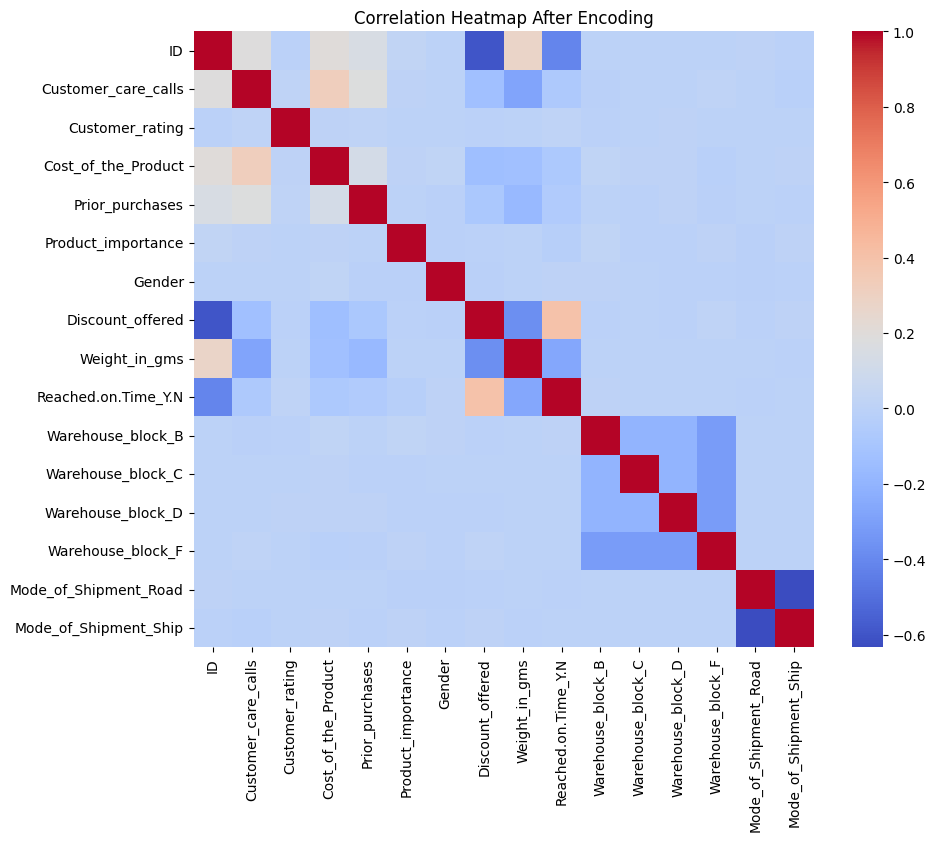

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(encode_data.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap After Encoding")
plt.show()


In [76]:
# Check only the encoded columns
encode_data[['Product_importance', 'Gender'] +
            [col for col in encode_data.columns if 'Warehouse_block' in col or 'Mode_of_Shipment' in col]].head()
# Convert all boolean columns to 0/1
encode_data = encode_data.astype(int)
encode_data.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
0,1,4,2,177,3,1,0,44,1233,1,0,0,1,0,0,0
1,2,4,5,216,2,1,1,59,3088,1,0,0,0,1,0,0
2,3,2,2,183,4,1,1,48,3374,1,0,0,0,0,0,0
3,4,3,3,176,4,2,1,10,1177,1,1,0,0,0,0,0
4,5,2,2,184,3,2,0,46,2484,1,0,1,0,0,0,0


In [77]:
# Initialize and apply scaler
std_scaler = StandardScaler()

# Columns to normalize
num_cols = ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
            'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
# Apply to numerical columns
std_scaled_data = encode_data.copy()
std_scaled_data[num_cols] = std_scaler.fit_transform(encode_data[num_cols])

# Check results
print(std_scaled_data[num_cols].describe())

       Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count         1.099900e+04     1.099900e+04         1.099900e+04   
mean          2.273943e-16    -7.041473e-17        -1.653777e-16   
std           1.000045e+00     1.000045e+00         1.000045e+00   
min          -1.799887e+00    -1.408199e+00        -2.376077e+00   
25%          -9.237994e-01    -7.007551e-01        -8.571765e-01   
50%          -4.771132e-02     6.689172e-03         7.913188e-02   
75%           8.283768e-01     7.141334e-01         8.489855e-01   
max           2.580553e+00     1.421578e+00         2.076590e+00   

       Prior_purchases  Discount_offered  Weight_in_gms  
count     1.099900e+04      1.099900e+04   1.099900e+04  
mean     -2.067221e-17      4.134443e-17  -1.653777e-16  
std       1.000045e+00      1.000045e+00   1.000045e+00  
min      -1.029424e+00     -7.635530e-01  -1.610109e+00  
25%      -3.727348e-01     -5.784225e-01  -1.097360e+00  
50%      -3.727348e-01     -3.932921e-0

# Feature Engineering of Cost of the product & weight in grams
1.   handling the infinity and nan values
2.   filling nan values with the median values

In [78]:
encode_data['Cost_to_Weight_ratio'] = encode_data['Cost_of_the_Product'] / encode_data['Weight_in_gms']

#Handling infinity and NaN values
encode_data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values  with the median of valid ratios
encode_data['Cost_to_Weight_ratio'].fillna(encode_data['Cost_to_Weight_ratio'].median(), inplace=True)

In [79]:
encode_data['Cost*Weight'] = encode_data['Cost_of_the_Product'] * encode_data['Weight_in_gms']

# Feature 2: Discount Ratio (Discount / Cost)
encode_data['Discount_Ratio'] = encode_data['Discount_offered'] / encode_data['Cost_of_the_Product']

# Handle infinite or NaN values after new features
encode_data.replace([np.inf, -np.inf], np.nan, inplace=True)
encode_data.fillna(0, inplace=True)


New feature columns added:
['CareCalls_to_Purchases', 'CostWeight_Discount_Interaction']

Feature summaries:
       CareCalls_to_Purchases  CostWeight_Discount_Interaction
count            10999.000000                     10999.000000
mean                 0.950328                         1.233690
std                  0.319213                         1.666928
min                  0.181818                         0.034626
25%                  0.750000                         0.233649
50%                  1.000000                         0.430181
75%                  1.200000                         1.594579
max                  2.000000                        15.386189


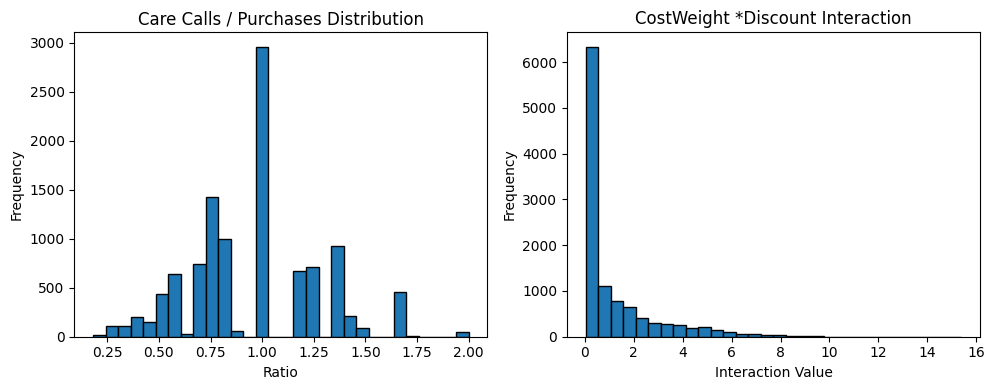

In [80]:
#  Additional Interaction Features

#  Ratio of Customer Care Calls to Prior Purchases
encode_data['CareCalls_to_Purchases'] = encode_data['Customer_care_calls'] / (encode_data['Prior_purchases'] + 1)
# Add +1 to avoid division by zero

#  Interaction between Cost-to-Weight Ratio and Discount
encode_data['CostWeight_Discount_Interaction'] = encode_data['Cost_to_Weight_ratio'] * (encode_data['Discount_offered'] + 1)
# Adding +1 to keep values non-zero and avoid scaling issues

# Handle infinity and NaN values (if any)
encode_data.replace([np.inf, -np.inf], np.nan, inplace=True)
encode_data.fillna(encode_data.median(numeric_only=True), inplace=True)

#  Quick verification
print("\nNew feature columns added:")
print(['CareCalls_to_Purchases', 'CostWeight_Discount_Interaction'])
print("\nFeature summaries:")
print(encode_data[['CareCalls_to_Purchases', 'CostWeight_Discount_Interaction']].describe())

#  Visualize the new features (optional)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(encode_data['CareCalls_to_Purchases'], bins=30, edgecolor='black')
plt.title('Care Calls / Purchases Distribution')
plt.xlabel('Ratio'); plt.ylabel('Frequency')

plt.subplot(1,2,2)
plt.hist(encode_data['CostWeight_Discount_Interaction'], bins=30, edgecolor='black')
plt.title('CostWeight *Discount Interaction')
plt.xlabel('Interaction Value'); plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [81]:
# Confirm all columns are numeric
print("\nAll numeric columns?", encode_data.dtypes.apply(lambda x: x != 'object').all())
print("\nCost_to_Weight_ratio summary:\n", encode_data['Cost_to_Weight_ratio'].describe())

# Preview first few rows
encode_data.head()


All numeric columns? True

Cost_to_Weight_ratio summary:
 count    10999.000000
mean         0.079229
std          0.055913
min          0.016482
25%          0.039771
50%          0.054916
75%          0.103455
max          0.309073
Name: Cost_to_Weight_ratio, dtype: float64


,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,...,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Cost_to_Weight_ratio,Cost*Weight,Discount_Ratio,CareCalls_to_Purchases,CostWeight_Discount_Interaction
0,1,4,2,177,3,1,0,44,1233,1,...,0,1,0,0,0,0.143552,218241,0.248588,1.000000,6.459854
1,2,4,5,216,2,1,1,59,3088,1,...,0,0,1,0,0,0.069948,667008,0.273148,1.333333,4.196891
2,3,2,2,183,4,1,1,48,3374,1,...,0,0,0,0,0,0.054238,617442,0.262295,0.400000,2.657676
3,4,3,3,176,4,2,1,10,1177,1,...,0,0,0,0,0,0.149533,207152,0.056818,0.600000,1.644860
4,5,2,2,184,3,2,0,46,2484,1,...,1,0,0,0,0,0.074074,457056,0.250000,0.500000,3.481481


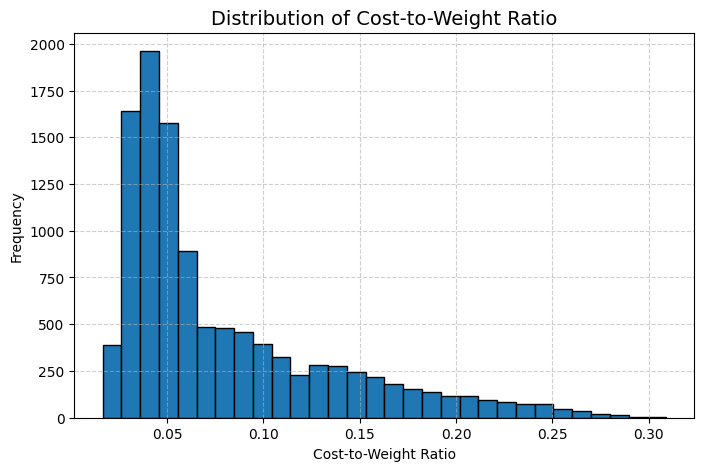

In [82]:
plt.figure(figsize=(8,5))
plt.hist(encode_data['Cost_to_Weight_ratio'], bins=30, edgecolor='black')
plt.title('Distribution of Cost-to-Weight Ratio', fontsize=14)
plt.xlabel('Cost-to-Weight Ratio')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


# Value Count

In [83]:
# For target column
print("Target Variable (Reached.on.Time_Y.N):")
print(data1['Reached.on.Time_Y.N'].value_counts())
print("\nNormalized Value Counts (Proportion):")
print(data1['Reached.on.Time_Y.N'].value_counts(normalize=True))

Target Variable (Reached.on.Time_Y.N):
Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

Normalized Value Counts (Proportion):
Reached.on.Time_Y.N
1    0.596691
0    0.403309
Name: proportion, dtype: float64


In [84]:
# For all categorical columns
categorical_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(data1[col].value_counts())
    print("\nNormalized:")
    print(data1[col].value_counts(normalize=True))



Column: Warehouse_block
Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

Normalized:
Warehouse_block
F    0.333303
D    0.166742
A    0.166652
B    0.166652
C    0.166652
Name: proportion, dtype: float64

Column: Mode_of_Shipment
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

Normalized:
Mode_of_Shipment
Ship      0.678425
Flight    0.161560
Road      0.160015
Name: proportion, dtype: float64

Column: Product_importance
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

Normalized:
Product_importance
low       0.481589
medium    0.432221
high      0.086190
Name: proportion, dtype: float64

Column: Gender
Gender
F    5545
M    5454
Name: count, dtype: int64

Normalized:
Gender
F    0.504137
M    0.495863
Name: proportion, dtype: float64


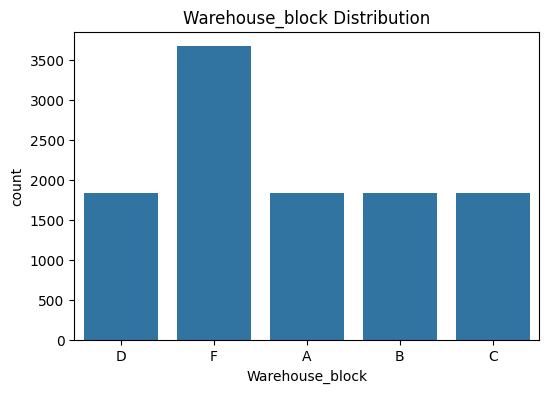

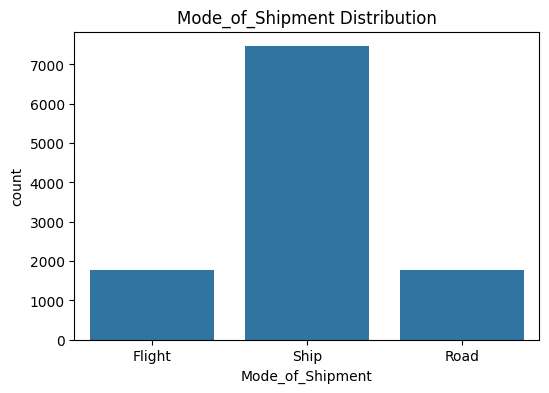

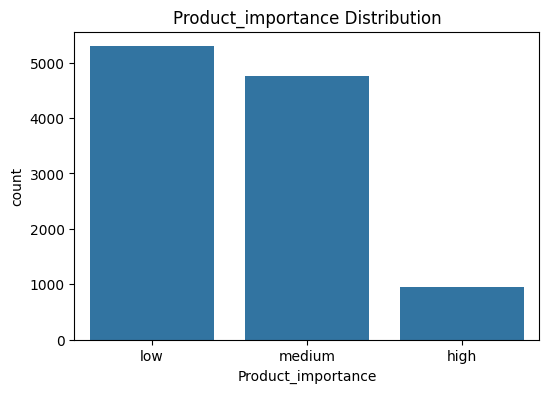

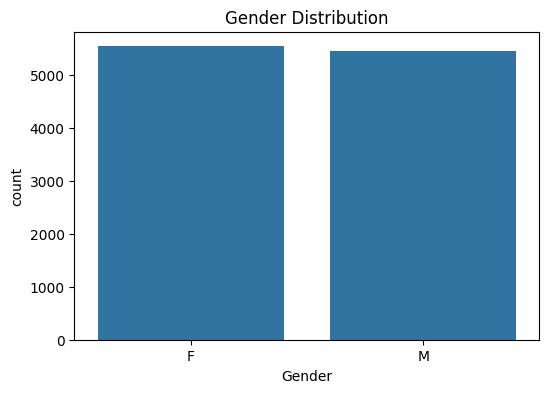

In [85]:
for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=data1)
    plt.title(f'{col} Distribution')
    plt.show()


In [86]:
encode_data.select_dtypes(include=['object']).columns
encode_data.dtypes

ID                                   int64
Customer_care_calls                  int64
Customer_rating                      int64
Cost_of_the_Product                  int64
Prior_purchases                      int64
Product_importance                   int64
Gender                               int64
Discount_offered                     int64
Weight_in_gms                        int64
Reached.on.Time_Y.N                  int64
Warehouse_block_B                    int64
Warehouse_block_C                    int64
Warehouse_block_D                    int64
Warehouse_block_F                    int64
Mode_of_Shipment_Road                int64
Mode_of_Shipment_Ship                int64
Cost_to_Weight_ratio               float64
Cost*Weight                          int64
Discount_Ratio                     float64
CareCalls_to_Purchases             float64
CostWeight_Discount_Interaction    float64
dtype: object

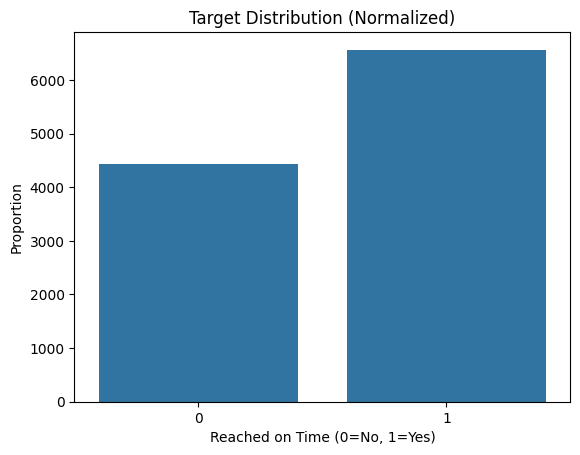

In [87]:
sns.countplot(x='Reached.on.Time_Y.N', data=data1)
plt.title('Target Distribution (Normalized)')
plt.xlabel('Reached on Time (0=No, 1=Yes)')
plt.ylabel('Proportion')
plt.show()

# Spliting the dataset into training and testing sets


In [88]:

# Spliting dataset into features (X) and target (y)
X = encode_data.drop('Reached.on.Time_Y.N', axis=1)
y = encode_data['Reached.on.Time_Y.N']

# Spliting the data into train(80%) and test(20%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# shape of the Training, testing dataset after splitting
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
from sklearn.model_selection import train_test_split

# Further split training data into train + validation
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)



Training set shape: (8799, 20)
Testing set shape: (2200, 20)


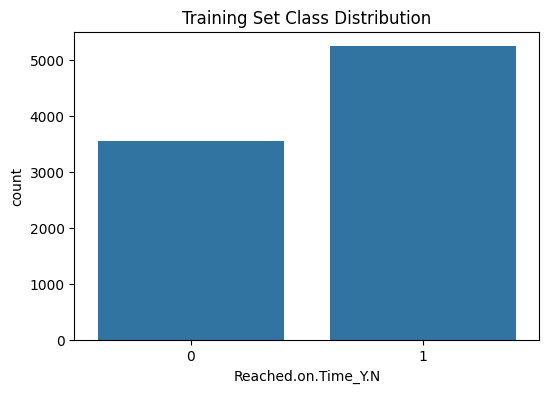

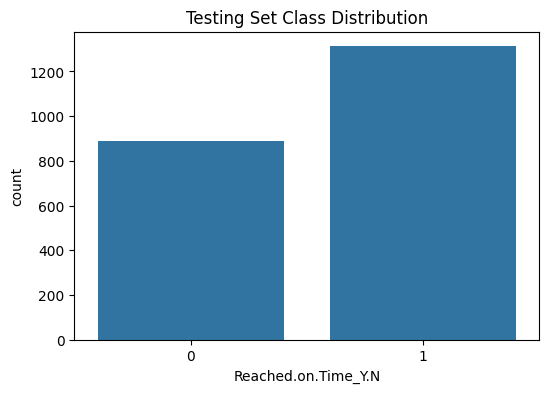

In [89]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title("Training Set Class Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x=y_test)
plt.title("Testing Set Class Distribution")
plt.show()


# Save training and testing data into separate CSV files


In [90]:

# Combine features and target for saving
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

# Save to CSV files
train_data.to_csv("ShipmentSure_Train_Data.csv", index=False)
test_data.to_csv("ShipmentSure_Test_Data.csv", index=False)

print("Training and Testing datasets saved successfully!")


Training and Testing datasets saved successfully!


# Handle Class Imbalance using SMOTE


In [91]:
# Check original class distribution
print("Before SMOTE class distribution:", Counter(y_train))

Before SMOTE class distribution: Counter({1: 5250, 0: 3549})


In [92]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("After SMOTE class distribution:", Counter(y_train_resampled))

After SMOTE class distribution: Counter({0: 5250, 1: 5250})


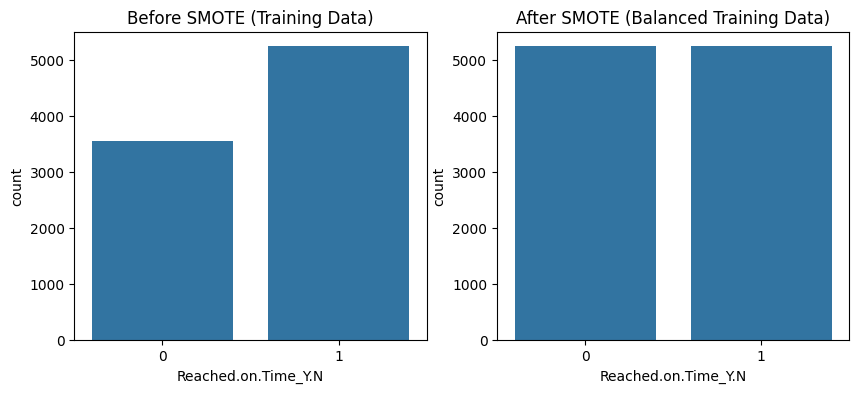

In [93]:
# Visualization before & after
fig, ax = plt.subplots(1, 2, figsize=(10,4))
sns.countplot(x=y_train, ax=ax[0])
ax[0].set_title("Before SMOTE (Training Data)")
sns.countplot(x=y_train_resampled, ax=ax[1])
ax[1].set_title("After SMOTE (Balanced Training Data)")
plt.show()

In [94]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
models = {
    "Logistic Regression": LogisticRegression(C=0.5, max_iter=1000, random_state=42),  # L2 regularization (smaller C = stronger)
    
    "Decision Tree": DecisionTreeClassifier(max_depth=8, min_samples_split=10, min_samples_leaf=5, random_state=42),
    
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42, n_jobs=-1),
    
    "Naive Bayes": GaussianNB(),
    
    "KNN": KNeighborsClassifier(n_neighbors=9),  # more neighbors → smoother, less overfitting
    
    "SVM": SVC(C=0.5, kernel='rbf', gamma='scale', random_state=42),
    
    "XGBoost": XGBClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6,subsample=0.8, colsample_bytree=0.8, reg_lambda=0.5, use_label_encoder=False, eval_metric='logloss', random_state=42),
    
    "LightGBM": LGBMClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6,num_leaves=20, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.2, reg_lambda=0.5, random_state=42),
    
    "CatBoost": CatBoostClassifier(
        iterations=500, learning_rate=0.05, depth=6, l2_leaf_reg=5, verbose=False, random_state=42)
}

In [95]:
results = []

for name, model in models.items():
    pipe = Pipeline([('scaler', StandardScaler()), ('model', model)])
    
    # Cross-validation accuracy (10-fold)
    cv_scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    
    results.append({
        'Model': name,
        'Mean CV Accuracy': round(np.mean(cv_scores), 4),
        'Std Dev': round(np.std(cv_scores), 4)
    })

results_df = pd.DataFrame(results).sort_values(by='Mean CV Accuracy', ascending=False)
print("\n Cross-validation results (Overfitting check):")
print(results_df)


 Cross-validation results (Overfitting check):
                 Model  Mean CV Accuracy  Std Dev
5                  SVM            0.6821   0.0110
2        Random Forest            0.6801   0.0091
1        Decision Tree            0.6727   0.0152
8             CatBoost            0.6652   0.0113
7             LightGBM            0.6641   0.0165
6              XGBoost            0.6595   0.0187
3          Naive Bayes            0.6550   0.0089
4                  KNN            0.6548   0.0150
0  Logistic Regression            0.6531   0.0090


In [96]:
# Fix random seed for consistency
RND = 42

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=RND)

# Define models with anti-overfitting hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C=0.1, penalty='l2', solver='liblinear', random_state=RND),
    "Decision Tree": DecisionTreeClassifier(max_depth=6, min_samples_split=10, min_samples_leaf=4, random_state=RND),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, 
                                            min_samples_leaf=3, max_features='sqrt', random_state=RND),
    "KNN": KNeighborsClassifier(n_neighbors=15),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(C=0.5, kernel='rbf', gamma='scale', random_state=RND),
    "XGBoost": XGBClassifier(max_depth=4, learning_rate=0.05, subsample=0.8, colsample_bytree=0.8,
                             reg_lambda=1, n_estimators=200, random_state=RND, eval_metric='logloss', use_label_encoder=False),
    "LightGBM": LGBMClassifier(num_leaves=20, max_depth=6, subsample=0.8, reg_lambda=0.5,
                               learning_rate=0.05, n_estimators=200, random_state=RND),
    "CatBoost": CatBoostClassifier(depth=6, learning_rate=0.05, l2_leaf_reg=3, n_estimators=200,
                                   verbose=0, random_state=RND)
}

In [97]:
# Run cross-validation to check improvement
cv_results = []
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

    cv_results.append({
        "Model": name,
        "Mean CV Accuracy": np.mean(scores),
        "Std Dev": np.std(scores)
    })

[LightGBM] [Info] Number of positive: 4725, number of negative: 3194
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001292 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1886
[LightGBM] [Info] Number of data points in the train set: 7919, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.596666 -> initscore=0.391594
[LightGBM] [Info] Start training from score 0.391594
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [52]:
# Display results
cv_df = pd.DataFrame(cv_results).sort_values(by="Mean CV Accuracy", ascending=False)
print("\nCross-validation results (After Regularization to Fix Overfitting):")
print(cv_df.to_string(index=False))


Cross-validation results (After Regularization to Fix Overfitting):
              Model  Mean CV Accuracy  Std Dev
      Decision Tree          0.682464 0.007069
      Random Forest          0.680305 0.006806
        Naive Bayes          0.677690 0.009101
           CatBoost          0.675191 0.012678
            XGBoost          0.671327 0.010807
           LightGBM          0.670645 0.013561
Logistic Regression          0.655191 0.011748
                KNN          0.647006 0.011958
                SVM          0.621888 0.017642


In [98]:
models = {
    "Logistic Regression": LogisticRegression(C=0.5, max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=8, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42, n_jobs=-1),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=9),
    "SVM": SVC(C=0.5, kernel='rbf', gamma='scale', probability=True, random_state=42),
    "XGBoost": XGBClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=0.5,
        use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6, num_leaves=20,
        subsample=0.8, colsample_bytree=0.8, reg_alpha=0.2, reg_lambda=0.5, random_state=42),
    "CatBoost": CatBoostClassifier(
        iterations=500, learning_rate=0.05, depth=6, l2_leaf_reg=5, verbose=False, random_state=42)
}


 Training and evaluating Logistic Regression...

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.56      0.64      0.60       710
           1       0.73      0.66      0.70      1050

    accuracy                           0.65      1760
   macro avg       0.65      0.65      0.65      1760
weighted avg       0.66      0.65      0.66      1760


 Training and evaluating Decision Tree...

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.58      0.89      0.70       710
           1       0.88      0.57      0.70      1050

    accuracy                           0.70      1760
   macro avg       0.73      0.73      0.70      1760
weighted avg       0.76      0.70      0.70      1760


 Training and evaluating Random Forest...

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.62 

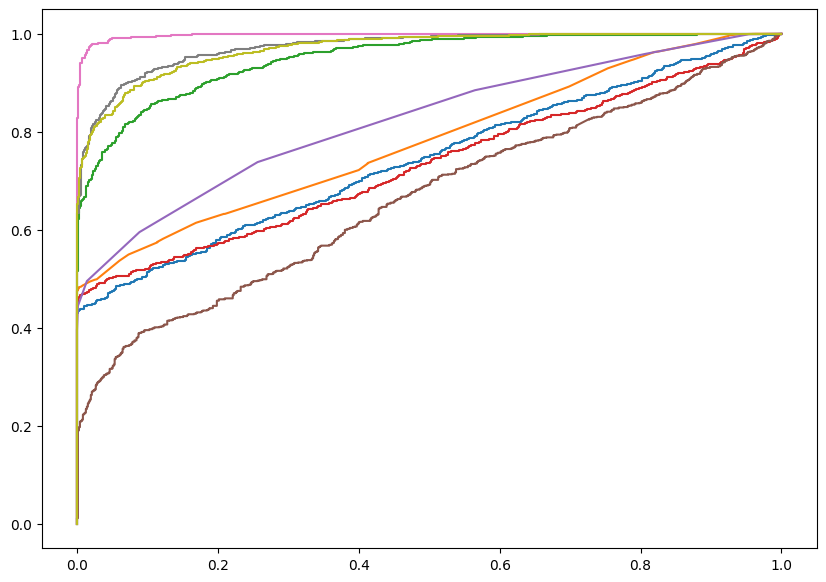

In [99]:
# Store results
results = {}
comparison = []

plt.figure(figsize=(10, 7))
for name, model in models.items():
    print(f"\n Training and evaluating {name}...")
    
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    y_val_prob = model.predict_proba(X_val)[:, 1]
    
    # Metrics
    acc = accuracy_score(y_val, y_val_pred)
    prec = precision_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred)
    f1 = f1_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, y_val_prob)
    
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_val, y_val_pred))
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_val, y_val_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})")
    
    comparison.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4),
        "ROC-AUC": round(roc_auc, 4)
    })


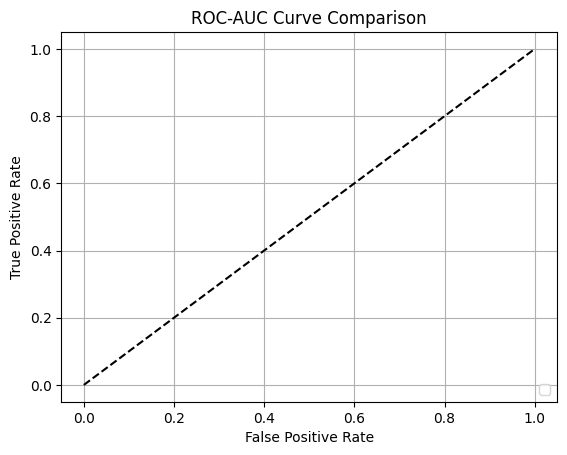

In [100]:
# ROC Curve 
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC-AUC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [101]:
# Final Comparison Table
comparison_df = pd.DataFrame(comparison).sort_values(by='ROC-AUC', ascending=False)
print("\nFinal Model Comparison Table:")
print(comparison_df)


Final Model Comparison Table:
                 Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
6              XGBoost    0.9676     0.9921  0.9533    0.9723   0.9976
7             LightGBM    0.8881     0.9723  0.8362    0.8991   0.9735
8             CatBoost    0.8761     0.9804  0.8086    0.8862   0.9697
2        Random Forest    0.7517     0.9984  0.5848    0.7375   0.9496
4                  KNN    0.7403     0.8098  0.7381    0.7723   0.8225
1        Decision Tree    0.7000     0.8816  0.5743    0.6955   0.7800
0  Logistic Regression    0.6545     0.7331  0.6619    0.6957   0.7435
3          Naive Bayes    0.6687     0.8350  0.5543    0.6663   0.7320
5                  SVM    0.6028     0.6339  0.7914    0.7039   0.6643


In [102]:
# Optional: save to CSV for report
comparison_df.to_csv("model_comparison_results.csv", index=False)

In [103]:
models = {
    "Logistic Regression": LogisticRegression(C=0.5, max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=8, min_samples_split=10, min_samples_leaf=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, min_samples_leaf=5, random_state=42, n_jobs=-1),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=9),
    "SVM": SVC(C=0.5, kernel='rbf', gamma='scale', probability=True, random_state=42),
    "XGBoost": XGBClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=0.5,
        use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(
        learning_rate=0.05, n_estimators=500, max_depth=6, num_leaves=20,
        subsample=0.8, colsample_bytree=0.8, reg_alpha=0.2, reg_lambda=0.5, random_state=42),
    "CatBoost": CatBoostClassifier(
        iterations=500, learning_rate=0.05, depth=6, l2_leaf_reg=5, verbose=False, random_state=42)
}


Training and Evaluating: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.64      0.60       710
           1       0.73      0.66      0.70      1050

    accuracy                           0.65      1760
   macro avg       0.65      0.65      0.65      1760
weighted avg       0.66      0.65      0.66      1760



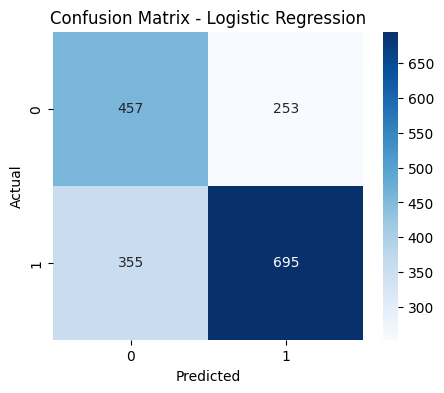

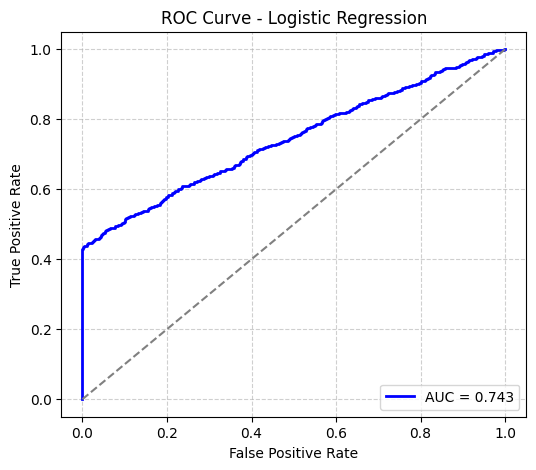


Training and Evaluating: Decision Tree

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.89      0.70       710
           1       0.88      0.57      0.70      1050

    accuracy                           0.70      1760
   macro avg       0.73      0.73      0.70      1760
weighted avg       0.76      0.70      0.70      1760



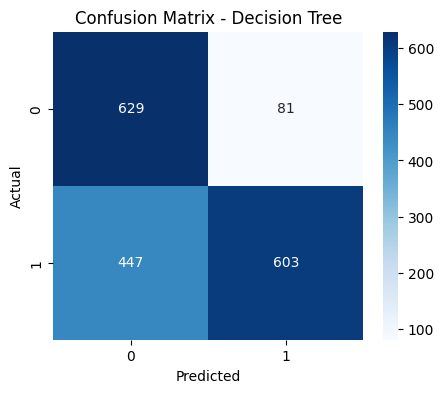

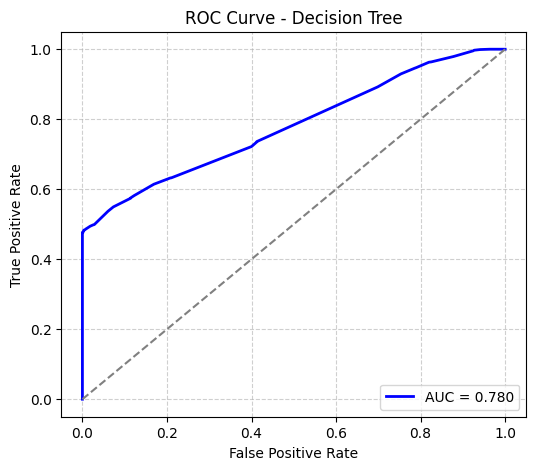


Training and Evaluating: Random Forest

Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.76       710
           1       1.00      0.58      0.74      1050

    accuracy                           0.75      1760
   macro avg       0.81      0.79      0.75      1760
weighted avg       0.85      0.75      0.75      1760



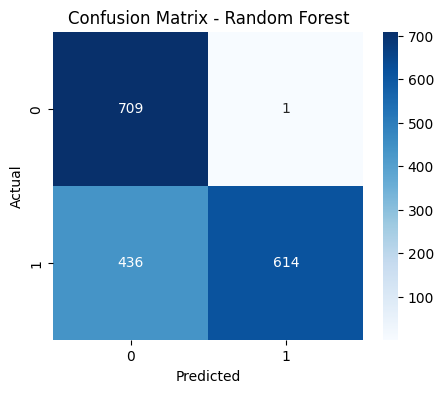

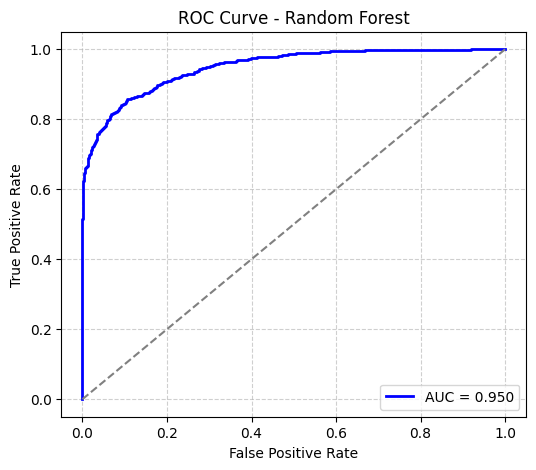


Training and Evaluating: Naive Bayes

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.84      0.67       710
           1       0.84      0.55      0.67      1050

    accuracy                           0.67      1760
   macro avg       0.70      0.70      0.67      1760
weighted avg       0.72      0.67      0.67      1760



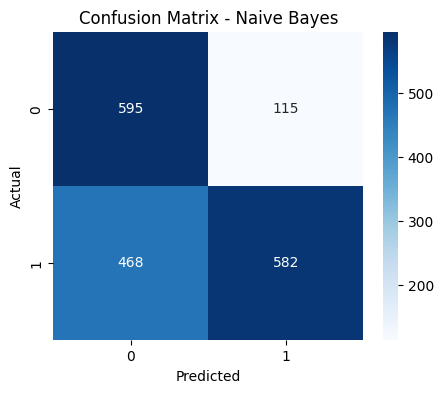

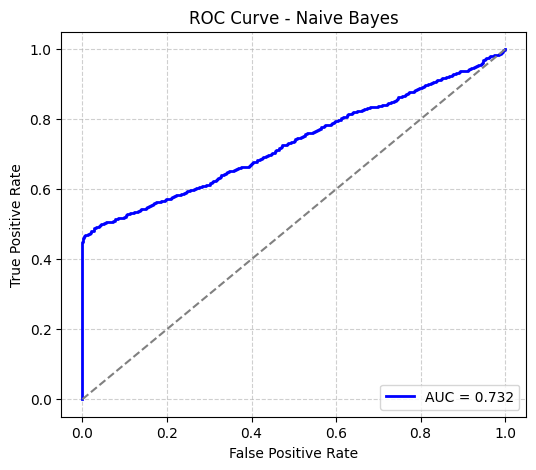


Training and Evaluating: KNN

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.74      0.70       710
           1       0.81      0.74      0.77      1050

    accuracy                           0.74      1760
   macro avg       0.73      0.74      0.74      1760
weighted avg       0.75      0.74      0.74      1760



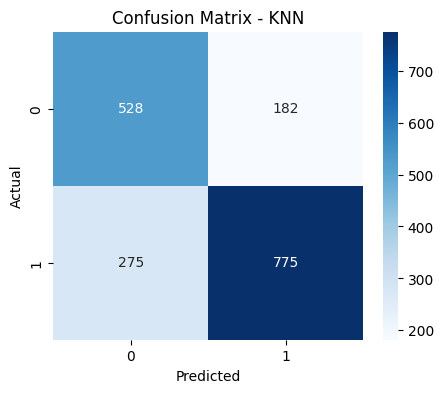

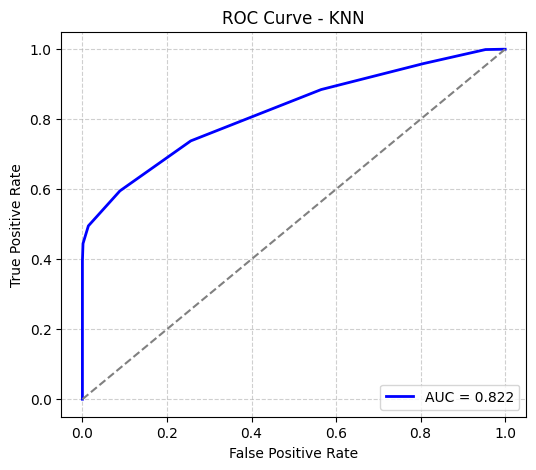


Training and Evaluating: SVM

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.32      0.40       710
           1       0.63      0.79      0.70      1050

    accuracy                           0.60      1760
   macro avg       0.57      0.56      0.55      1760
weighted avg       0.58      0.60      0.58      1760



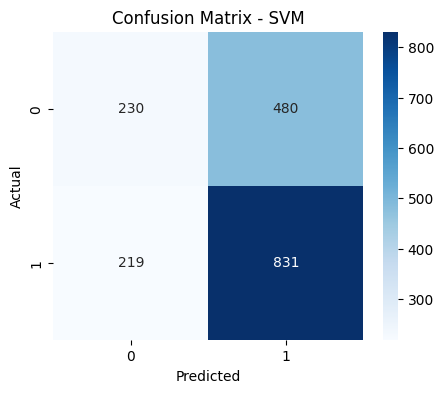

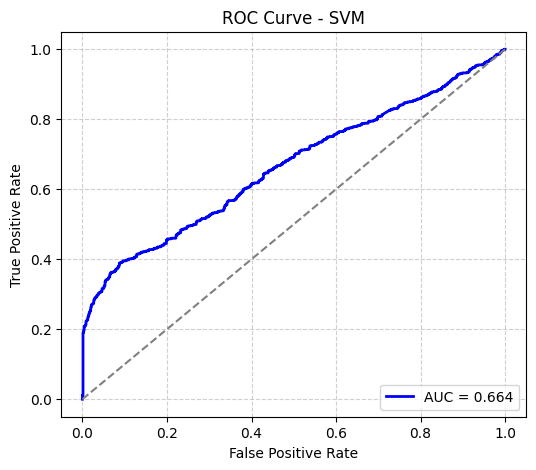


Training and Evaluating: XGBoost

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       710
           1       0.99      0.95      0.97      1050

    accuracy                           0.97      1760
   macro avg       0.96      0.97      0.97      1760
weighted avg       0.97      0.97      0.97      1760



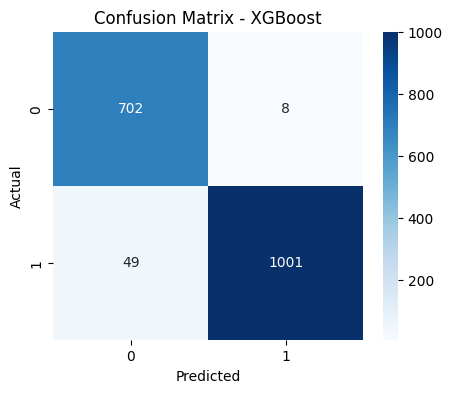

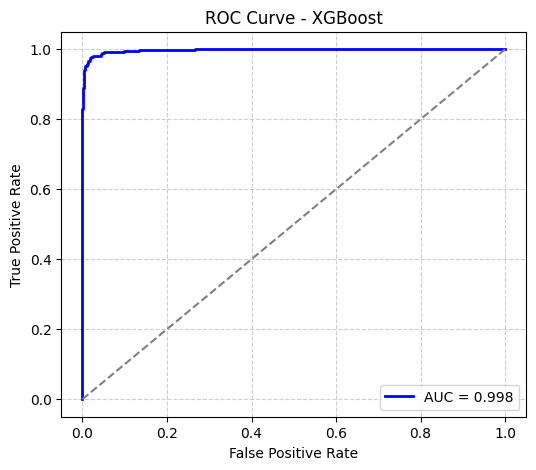


Training and Evaluating: LightGBM
[LightGBM] [Info] Number of positive: 5250, number of negative: 3549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000460 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1886
[LightGBM] [Info] Number of data points in the train set: 8799, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.596659 -> initscore=0.391562
[LightGBM] [Info] Start training from score 0.391562
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

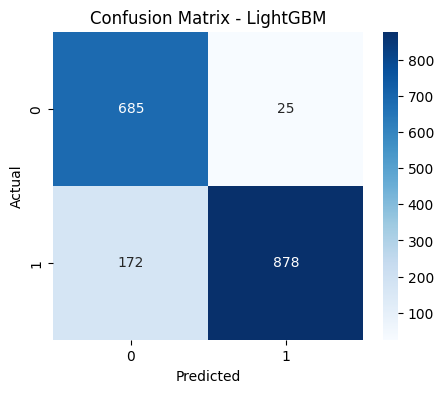

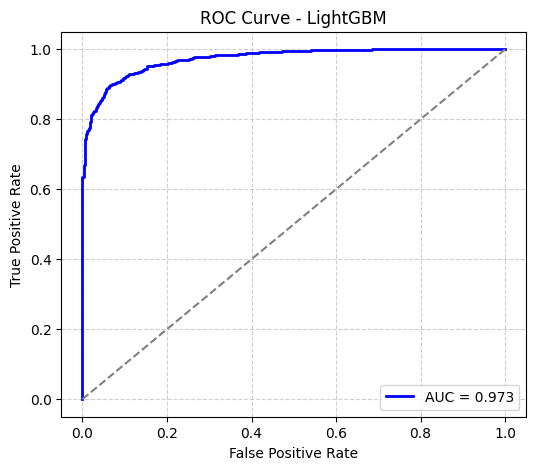


Training and Evaluating: CatBoost

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.98      0.86       710
           1       0.98      0.81      0.89      1050

    accuracy                           0.88      1760
   macro avg       0.88      0.89      0.88      1760
weighted avg       0.90      0.88      0.88      1760



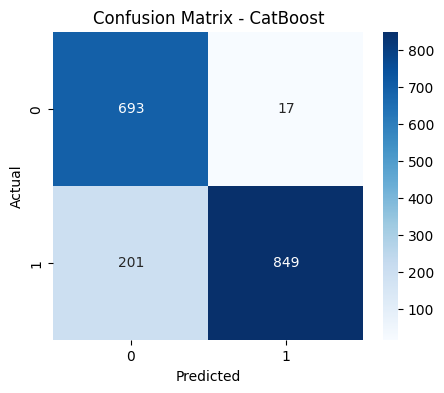

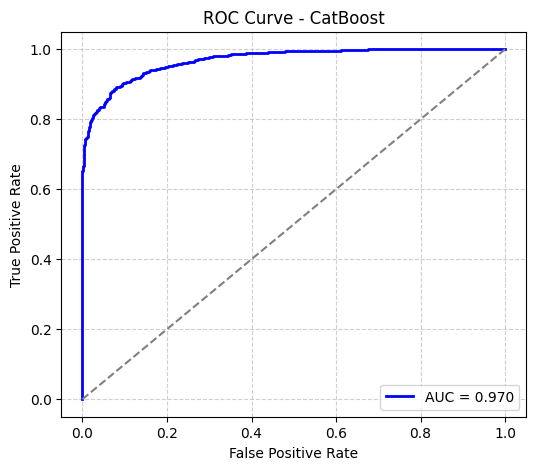

In [104]:
comparison = []

for name, model in models.items():
    print(f"\nTraining and Evaluating: {name}")
    
    
    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]
    
    # Metrics
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob)

    
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))
    
    
    plt.figure(figsize=(5,4))
    sns.heatmap(pd.crosstab(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    

    fpr, tpr, _ = roc_curve(y_val, y_prob)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f"AUC = {roc_auc:.3f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.title(f"ROC Curve - {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

    # Store Results
    comparison.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4),
        "ROC-AUC": round(roc_auc, 4)
    })

In [105]:
comparison_df = pd.DataFrame(comparison).sort_values(by="ROC-AUC", ascending=False)
print("\nFinal Model Comparison Table:")
print(comparison_df)


Final Model Comparison Table:
                 Model  Accuracy  Precision  Recall  F1 Score  ROC-AUC
6              XGBoost    0.9676     0.9921  0.9533    0.9723   0.9976
7             LightGBM    0.8881     0.9723  0.8362    0.8991   0.9735
8             CatBoost    0.8761     0.9804  0.8086    0.8862   0.9697
2        Random Forest    0.7517     0.9984  0.5848    0.7375   0.9496
4                  KNN    0.7403     0.8098  0.7381    0.7723   0.8225
1        Decision Tree    0.7000     0.8816  0.5743    0.6955   0.7800
0  Logistic Regression    0.6545     0.7331  0.6619    0.6957   0.7435
3          Naive Bayes    0.6687     0.8350  0.5543    0.6663   0.7320
5                  SVM    0.6028     0.6339  0.7914    0.7039   0.6643


In [107]:
# Step 1: Find the best model based on ROC-AUC
best_model_name = comparison_df.iloc[0]['Model']
print(f"\nBest model based on ROC-AUC: {best_model_name}")

#  Step 2: Save that model
best_model = models[best_model_name]
joblib.dump(best_model, f"{best_model_name}_best_model.pkl")
print(f"Model saved successfully as '{best_model_name}_best_model.pkl'")



Best model based on ROC-AUC: XGBoost
Model saved successfully as 'XGBoost_best_model.pkl'


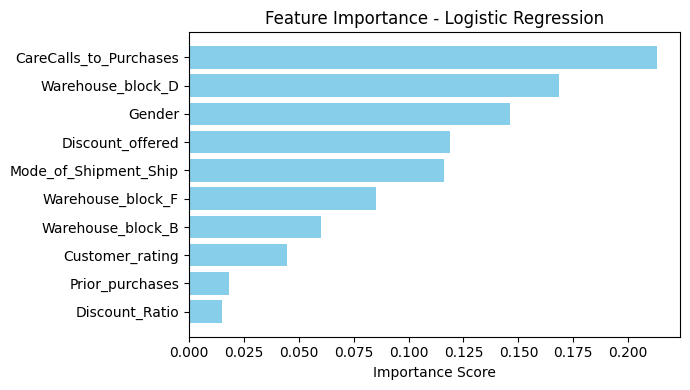

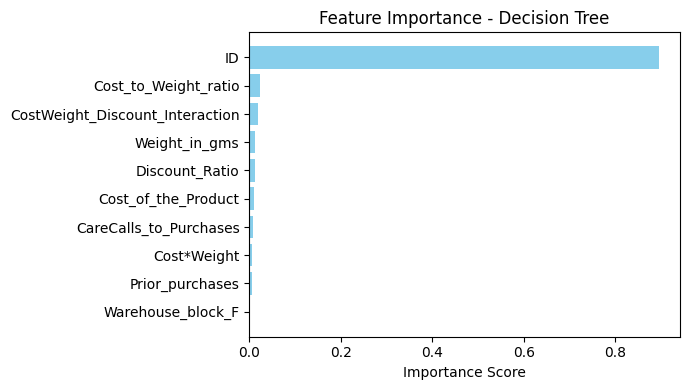

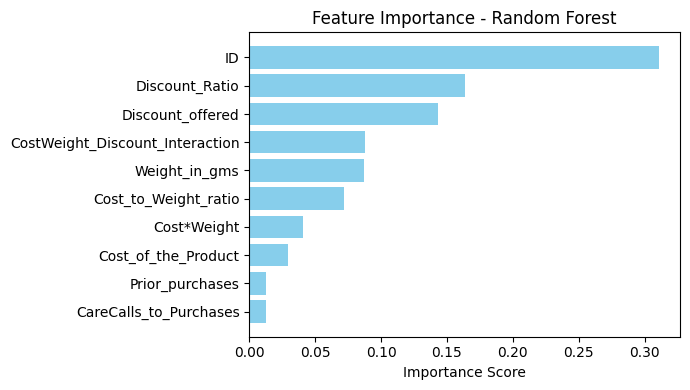

Naive Bayes does not support feature importance.
KNN does not support feature importance.
SVM does not support feature importance.


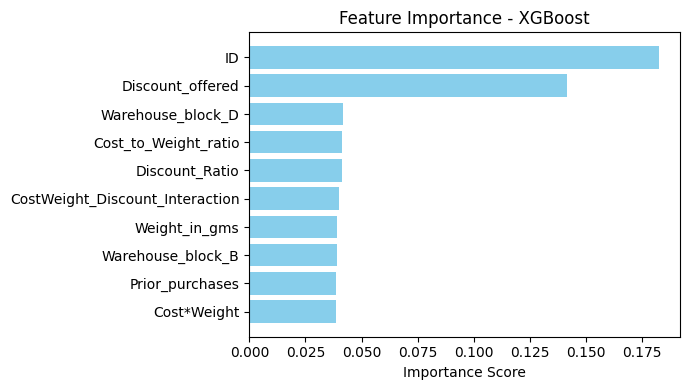

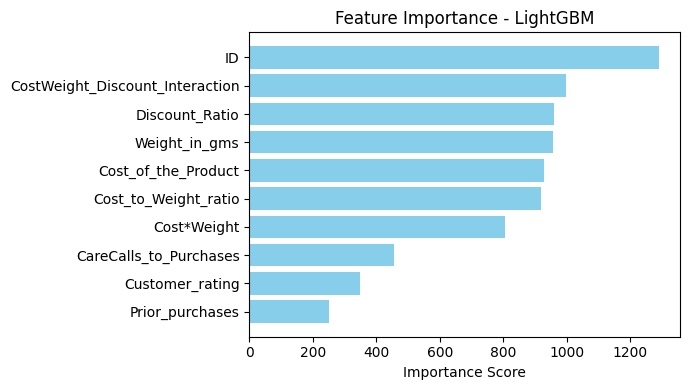

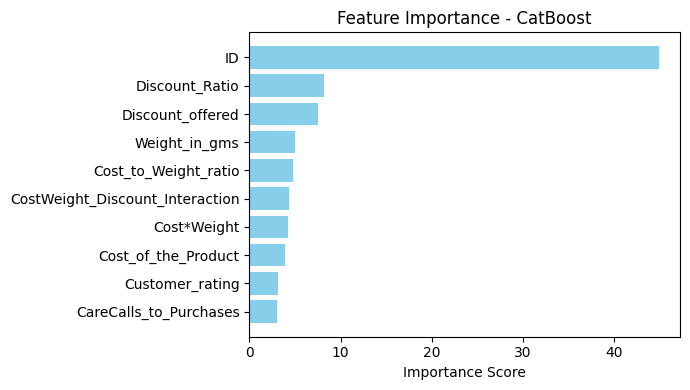

In [108]:
feature_names = X_train.columns

def plot_feature_importance(model, model_name):
    if hasattr(model, "feature_importances_"):
        importance = model.feature_importances_
    elif hasattr(model, "coef_"):
        importance = model.coef_[0]
    else:
        print(f"{model_name} does not support feature importance.")
        return
    
    imp_df = pd.DataFrame({
        "Feature": feature_names,
        "Importance": importance
    }).sort_values(by="Importance", ascending=False).head(10)
    
    plt.figure(figsize=(7,4))
    plt.barh(imp_df["Feature"], imp_df["Importance"], color="skyblue")
    plt.gca().invert_yaxis()
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Importance Score")
    plt.tight_layout()
    plt.show()

# Loop directly over your existing models
for name, model in models.items():
    plot_feature_importance(model, name)



Top 10 Most Important Features Across All Models:

                                 Logistic Regression  Decision Tree  \
ID                                      1.529810e-04       0.896812   
CostWeight_Discount_Interaction         2.003708e-01       0.017883   
Discount_Ratio                          1.488728e-02       0.012092   
Weight_in_gms                           1.258794e-04       0.012156   
Cost_of_the_Product                     1.943553e-03       0.010122   
Cost_to_Weight_ratio                    3.021483e-02       0.024332   
Cost*Weight                             1.747242e-07       0.006680   
CareCalls_to_Purchases                  2.128970e-01       0.007990   
Customer_rating                         4.471954e-02       0.000000   
Prior_purchases                         1.825083e-02       0.006006   

                                 Random Forest   XGBoost  LightGBM   CatBoost  \
ID                                    0.311344  0.182686      1292  44.950882   
Cost

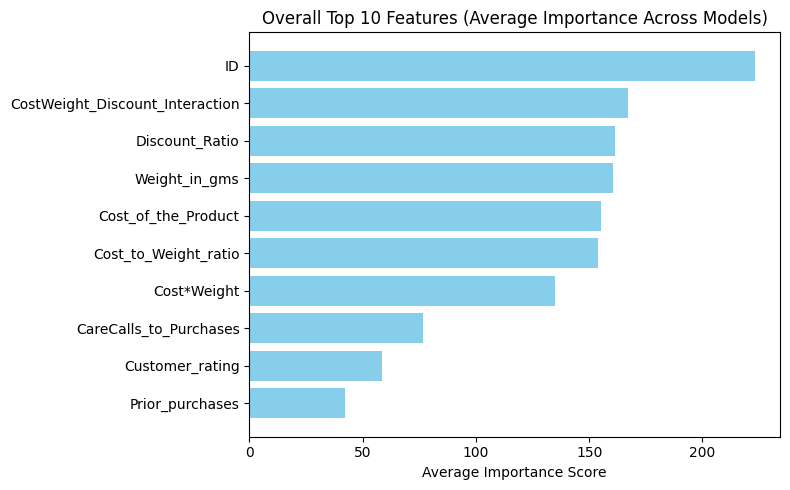

In [109]:
# Only include models that support feature importance or coefficients
supported_models = {name: model for name, model in models.items() 
                    if hasattr(model, "feature_importances_") or hasattr(model, "coef_")}

feature_names = X_train.columns

# Store importance values for each model
importance_df = pd.DataFrame(index=feature_names)

for name, model in supported_models.items():
    if hasattr(model, "feature_importances_"):
        importance_df[name] = model.feature_importances_
    elif hasattr(model, "coef_"):
        importance_df[name] = np.abs(model.coef_[0])  # use absolute values for coefficients

# Compute average importance across models
importance_df["Average_Importance"] = importance_df.mean(axis=1)

# Sort by average importance
top_features = importance_df.sort_values(by="Average_Importance", ascending=False).head(10)

# Display table
print("\nTop 10 Most Important Features Across All Models:\n")
print(top_features)

# Plot
plt.figure(figsize=(8,5))
plt.barh(top_features.index, top_features["Average_Importance"], color="skyblue")
plt.gca().invert_yaxis()
plt.title("Overall Top 10 Features (Average Importance Across Models)")
plt.xlabel("Average Importance Score")
plt.tight_layout()
plt.show()


Class distribution in Test Data:
Reached.on.Time_Y.N
1    0.596818
0    0.403182
Name: proportion, dtype: float64


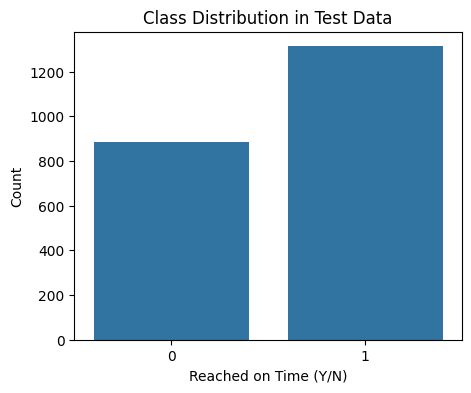

In [110]:
# Check class balance in test set
print("Class distribution in Test Data:")
print(y_test.value_counts(normalize=True))

# Optional: Visualize
plt.figure(figsize=(5,4))
sns.countplot(x=y_test)
plt.title("Class Distribution in Test Data")
plt.xlabel("Reached on Time (Y/N)")
plt.ylabel("Count")
plt.show()


In [112]:
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Precision": round(precision_score(y_test, y_pred), 4),
        "Recall": round(recall_score(y_test, y_pred), 4),
        "F1-Score": round(f1_score(y_test, y_pred), 4)
    })

#  Create and display the comparison table
results_df = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)
print("Model Evaluation on Test Data:")
print(results_df)


Model Evaluation on Test Data:
                 Model  Accuracy  Precision  Recall  F1-Score
5                  SVM    0.6332     0.6543  0.8172    0.7267
0  Logistic Regression    0.6568     0.7317  0.6710    0.7000
4                  KNN    0.6523     0.7322  0.6580    0.6931
6              XGBoost    0.6577     0.7550  0.6314    0.6877
8             CatBoost    0.6645     0.7973  0.5872    0.6763
7             LightGBM    0.6500     0.7559  0.6108    0.6757
3          Naive Bayes    0.6723     0.8491  0.5484    0.6664
1        Decision Tree    0.6705     0.8492  0.5446    0.6636
2        Random Forest    0.6782     0.9403  0.4920    0.6460


In [113]:
#  Redefine all models with regularization and simpler configs

models = {
    "Logistic Regression": LogisticRegression(C=0.3, penalty='l2', solver='liblinear', max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=20, min_samples_leaf=10, random_state=42),
    "Random Forest": RandomForestClassifier(
        n_estimators=100, max_depth=8, min_samples_split=10, min_samples_leaf=5,
        max_features='sqrt', random_state=42, n_jobs=-1),
    "KNN": KNeighborsClassifier(n_neighbors=7, weights='distance'),
    "SVM": LinearSVC(C=0.5, max_iter=2000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(
        learning_rate=0.05, n_estimators=200, max_depth=4, subsample=0.7,
        colsample_bytree=0.7, reg_lambda=2, reg_alpha=0.5,
        use_label_encoder=False, eval_metric='logloss', random_state=42),
    "LightGBM": LGBMClassifier(
        learning_rate=0.05, n_estimators=200, max_depth=4, num_leaves=15,
        subsample=0.7, colsample_bytree=0.7, reg_lambda=2, reg_alpha=0.5, random_state=42),
    "CatBoost": CatBoostClassifier(
        iterations=200, learning_rate=0.05, depth=4, l2_leaf_reg=6, verbose=False, random_state=42)
}


In [114]:
# Retrain all models on balanced (SMOTE) training data
print("Training Models with Regularized Parameters...\n")
for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
print("All models retrained successfully!")


Training Models with Regularized Parameters...

[LightGBM] [Info] Number of positive: 5250, number of negative: 5250
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000467 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2100
[LightGBM] [Info] Number of data points in the train set: 10500, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

In [115]:
#   Check Cross-Validation Accuracy (to ensure models generalize well)
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy', n_jobs=-1)
    print(f"{name}: Mean CV Accuracy = {scores.mean():.4f}")


Logistic Regression: Mean CV Accuracy = 0.7057
Decision Tree: Mean CV Accuracy = 0.7305
Random Forest: Mean CV Accuracy = 0.7373
KNN: Mean CV Accuracy = 0.7243
SVM: Mean CV Accuracy = 0.6746
Naive Bayes: Mean CV Accuracy = 0.7299
XGBoost: Mean CV Accuracy = 0.7138
LightGBM: Mean CV Accuracy = 0.7162
CatBoost: Mean CV Accuracy = 0.7223


In [116]:
# Evaluate retrained models on Test Data
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Precision": round(precision_score(y_test, y_pred), 4),
        "Recall": round(recall_score(y_test, y_pred), 4),
        "F1-Score": round(f1_score(y_test, y_pred), 4)
    })

results_df_new = pd.DataFrame(results).sort_values(by="F1-Score", ascending=False)
print("\nModel Evaluation on Test Data (After Regularization):")
print(results_df_new)



Model Evaluation on Test Data (After Regularization):
                 Model  Accuracy  Precision  Recall  F1-Score
3                  KNN    0.6745     0.7895  0.6200    0.6945
4                  SVM    0.6673     0.7759  0.6222    0.6906
6              XGBoost    0.6741     0.8801  0.5255    0.6581
7             LightGBM    0.6750     0.8893  0.5202    0.6564
0  Logistic Regression    0.6677     0.8584  0.5308    0.6560
5          Naive Bayes    0.6805     0.9296  0.5027    0.6525
8             CatBoost    0.6823     0.9501  0.4935    0.6496
1        Decision Tree    0.6691     0.8980  0.5027    0.6445
2        Random Forest    0.6827     1.0000  0.4684    0.6380


In [123]:
# Save model
pickle.dump(best_model, open("XGBoost_best_model.pkl", "wb"))

# Save label encoders (dictionary)
pickle.dump(encoders, open("encoder.pkl", "wb"))

# Save standard scaler
pickle.dump(std_scaler, open("scaler.pkl", "wb"))

print(" Model, encoders, and scaler saved successfully!")


 Model, encoders, and scaler saved successfully!
